In [2]:
cz1217 = ['https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.csv', 'https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.csv', 'https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.csv', 'https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.csv', 'https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.csv', 'https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.csv']

In [3]:
! conda install geopandas -qy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os




Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    click-plugins:   1.0.3-py36_0      conda-forge
    cligj:           0.4.0-py36_0      conda-forge
    curl:            7.54.1-0          conda-forge
    descartes:       1.1.0-py36_0      conda-forge
    fiona:           1.7.10-py36_1     conda-forge
    freexl:          1.0.2-2           conda-forge
    gdal:            2.1.3-np112py36_3 conda-forge
    geopandas:       0.3.0-py36_0      conda-forge
    geos:            3.5.1-1           conda-forge
    giflib:          5.1.4-0           conda-forge
    hdf4:            4.2.12-0          conda-forge
    json-c:          0.12.1-0          conda-forge
    kealib:          1.4.6-3           conda-forge
    krb5:            1.14.2-0          conda-forge
    libdap4:         3.18.3-2          conda-forge
    libnetcdf:       4.4.1-0           conda-forge
    libpq:           9.6.3-0           conda-forge
    libspatialindex: 1.8.5

In [17]:
constr12 = pd.read_csv('https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.csv')

In [18]:
constr13 = pd.read_csv('https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.csv')

In [19]:
constr14 = pd.read_csv('https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.csv')

In [20]:
constr15 = pd.read_csv('https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.csv')

In [21]:
constr16 = pd.read_csv('https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.csv')

In [22]:
constr17 = pd.read_csv('https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.csv')

In [23]:
constr12_17 = pd.concat([constr12, constr13, constr14, constr15, constr16, constr17], axis=0, ignore_index=True)

In [24]:
constr12_17.head().T

,0,1,2,3,4
X,-77.0227,-77.0172,-77.0403,-77.0159,-77.047
Y,38.899,38.8776,38.8985,38.901,38.9049
OBJECTID,28724350,28742523,28743567,28745944,28749147
APPLICATIONDATE,2007-02-07T00:00:00.000Z,2009-02-25T09:13:49.000Z,2009-06-11T11:40:35.000Z,2009-08-14T17:05:20.000Z,2010-07-20T14:41:48.000Z
ISEXCAVATION,F,T,F,F,F
ISFIXTURE,F,F,F,T,T
ISPAVING,F,F,F,F,F
ISLANDSCAPING,F,F,F,F,F
ISPROJECTIONS,F,F,F,F,F
ISPSRENTAL,T,F,T,F,F


In [25]:
constr12_17.shape

(78022, 28)

In [26]:
constr12_17['effective_date'] = pd.to_datetime(constr12_17['EFFECTIVEDATE'])
constr12_17['expire_date'] = pd.to_datetime(constr12_17['EXPIRATIONDATE'])
permit_length = (constr12_17.expire_date - constr12_17.effective_date)
print(permit_length)

0       120 days 00:00:00
1        98 days 00:00:00
2       365 days 00:00:00
3        18 days 00:00:00
4       364 days 00:00:00
5       364 days 00:00:00
6       364 days 00:00:00
7       364 days 00:00:00
8       307 days 10:26:07
9       365 days 00:00:00
10      364 days 00:00:00
11      364 days 00:00:00
12      179 days 00:00:00
13      364 days 00:00:00
14      364 days 00:00:00
15      364 days 00:00:00
16       80 days 00:00:00
17       80 days 00:00:00
18       80 days 00:00:00
19      365 days 00:00:00
20      364 days 00:00:00
21       67 days 00:00:00
22       28 days 00:00:00
23      179 days 00:00:00
24      306 days 00:00:00
25      364 days 00:00:00
26       77 days 00:00:00
27       61 days 00:00:00
28      306 days 00:00:00
29      364 days 00:00:00
               ...       
77992    59 days 00:00:00
77993    60 days 00:00:00
77994    59 days 00:00:00
77995    59 days 00:00:00
77996    59 days 00:00:00
77997   139 days 00:00:00
77998    59 days 00:00:00
77999    60 

In [27]:
permits = constr12_17[(constr12_17['STATUS']=='Permit Expired') | 
                (constr12_17['STATUS']=='Approved (Pending Payment)') |
                (constr12_17['STATUS']=='Issued') |
                (constr12_17['STATUS']=='Assigned')]
print(permits.STATUS.unique())

['Permit Expired' 'Issued' 'Assigned' 'Approved (Pending Payment)']


In [38]:
permits.sort_values('effective_date')
permits['month'] = 0
permits['month'] = 0

permits['month'] = permits['effective_date'].dt.year + (permits['effective_date'].dt.month/100)
permits['endmonth'] = permits['expire_date'].dt.year + (permits['expire_date'].dt.month/100)

permits = permits.set_index(['month'])
permits = permits.sort_index(ascending=True)
permits.reset_index(inplace=True)

permits = permits.dropna(subset=['STATUS', 'endmonth', 'month', 'LONGITUDE', 'LATITUDE'])
    
print(permits.month.max(), permits.month.min())


2017.12 2012.01


In [29]:
! wget https://opendata.arcgis.com/datasets/6969dd63c5cb4d6aa32f15effb8311f3_8.geojson -O census2012

--2017-11-09 22:33:01--  https://opendata.arcgis.com/datasets/6969dd63c5cb4d6aa32f15effb8311f3_8.geojson
Resolving opendata.arcgis.com (opendata.arcgis.com)... 52.44.193.83, 34.238.141.53
Connecting to opendata.arcgis.com (opendata.arcgis.com)|52.44.193.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘census2012’

census2012              [ <=>                ]   1.71M  --.-KB/s    in 0.03s   

2017-11-09 22:33:02 (59.9 MB/s) - ‘census2012’ saved [1794478]



In [30]:
import geopandas as gpd
import os
census = gpd.read_file('census2012')

In [31]:
census.columns

Index(['OBJECTID', 'TRACT', 'GEOID', 'P0010001', 'P0010002', 'P0010003',
       'P0010004', 'P0010005', 'P0010006', 'P0010007', 'P0010008', 'OP000001',
       'OP000002', 'OP000003', 'OP000004', 'P0020002', 'P0020005', 'P0020006',
       'P0020007', 'P0020008', 'P0020009', 'P0020010', 'OP00005', 'OP00006',
       'OP00007', 'OP00008', 'P0030001', 'P0030003', 'P0030004', 'P0030005',
       'P0030006', 'P0030007', 'P0030008', 'OP00009', 'OP00010', 'OP00011',
       'OP00012', 'P0040002', 'P0040005', 'P0040006', 'P0040007', 'P0040008',
       'P0040009', 'P0040010', 'OP000013', 'OP000014', 'OP000015', 'OP000016',
       'H0010001', 'H0010002', 'H0010003', 'ACRES', 'SQ_MILES', 'Shape_Length',
       'Shape_Area', 'FAGI_TOTAL_2010', 'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2013',
       'FAGI_MEDIAN_2013', 'geometry'],
      dtype='object')

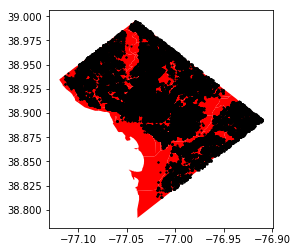

In [32]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(permits.LONGITUDE.apply(float), permits.LATITUDE.apply(float))]
crs = {'init': 'epsg:4326'}
points = gpd.GeoDataFrame(permits, crs=crs, geometry=geometry)
fig, ax = plt.subplots()
census.plot(ax=ax, color='red')
points.plot(ax=ax, color='black', marker='.', markersize=5)
ax.set_aspect('equal')

In [33]:
geo_constr = gpd.sjoin(census, points, how='left', op='intersects')
geo_constr.head()

,OBJECTID_left,TRACT,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,...,OWNERNAME,CONTRACTORNAME,WORKDETAIL,READYFORREVIEWDATE,APPLICANTCOMPANYNAME,LATITUDE,LONGITUDE,effective_date,expire_date,endmonth
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,Greg Calderon,Gregory Calderon,Up to 3 Utility Test Holes to identify the dep...,2016-10-25T07:33:37.000Z,NaN,38.960390,-77.085981,2016-12-07,2017-02-07,2017.02
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,Lightower Lightower,LIGHTOWER LIGHTOWER,Excavate to install (2) -3' x 2' x 3' Lightowe...,2015-07-02T15:20:55.000Z,NaN,38.960464,-77.086147,2015-09-08,2015-11-06,2015.11
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,VERIZON,NaN,Per emergency permit excavated to replace Veri...,2015-08-20T08:20:23.000Z,VERIZON,38.960782,-77.085733,2015-08-20,2015-10-18,2015.10
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,DISTRICT DEPARTMENT OF TRANSPORTATION,NaN,The Tenlytown Historical Society will clean th...,2012-10-09T16:11:46.000Z,NaN,38.960782,-77.085733,2012-10-15,2012-11-06,2012.11
0,1,001001,11001001001,7436,7168,6342,298,17,432,2,...,Potomac Electric Power Company,NaN,WR#3486881 CUT#40139-REPLACE MANHOLE FRAME AND...,2015-08-19T15:24:41.000Z,Potomac Electric Power Company,38.960782,-77.085733,2015-08-19,2015-10-01,2015.10


In [34]:
geo_constr.geometry.head()

0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
0    POLYGON ((-77.07862731061486 38.94604079377298...
Name: geometry, dtype: object

In [35]:
Contruct2HouseRatio = pd.DataFrame(geo_constr.TRACT.value_counts()*100000/geo_constr.H0010002.sum())
print(Contruct2HouseRatio)

           TRACT
010700  1.496328
010600  1.443610
005800  1.057007
000100  0.952449
001001  0.944541
004400  0.927847
007200  0.923453
011100  0.868977
000801  0.816259
000901  0.754754
010100  0.738938
003200  0.732788
010200  0.685341
004801  0.684463
004600  0.652831
000202  0.651074
005500  0.645802
002502  0.634380
010800  0.615928
001100  0.608021
008803  0.594841
008802  0.585176
002900  0.584297
009301  0.584297
003301  0.573754
002400  0.564089
001500  0.561453
003800  0.544758
009400  0.543001
000600  0.539487
...          ...
007409  0.158156
009904  0.152005
007709  0.151127
009906  0.150248
011000  0.135311
002202  0.134432
002001  0.134432
009507  0.127403
009804  0.126525
007404  0.124767
007408  0.113345
009802  0.113345
009801  0.111588
010900  0.110709
009903  0.108952
007708  0.108073
007406  0.103680
009000  0.102801
007605  0.101923
009811  0.098408
001803  0.087864
009810  0.087864
009700  0.084350
009907  0.080835
007403  0.074685
007301  0.066777
006804  0.0632